In [5]:
import pandas as pd
import numpy as np
import datetime, random, json, time, requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns

sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 200

In [2]:
df_CST = pd.read_csv(r'./tokenCST_prices.csv', sep='\t', index_col=0)
df_AA = pd.read_csv(r'./tokenAA_prices.csv', sep='\t',  index_col=0)

In [12]:
x = [datetime.datetime.strptime(d,'%Y-%m-%d %H:%M:%S') for d in df_CST.index]
df_CST.index = x
df_CST.index

DatetimeIndex(['2019-06-23 18:00:00', '2019-06-23 19:00:00',
               '2019-06-23 20:00:00', '2019-06-23 21:00:00',
               '2019-06-23 22:00:00', '2019-06-23 23:00:00',
               '2019-06-24 00:00:00', '2019-06-24 01:00:00',
               '2019-06-24 02:00:00', '2019-06-24 03:00:00',
               ...
               '2020-06-26 16:36:18', '2020-06-26 16:45:10',
               '2020-06-26 16:54:01', '2020-06-26 17:01:35',
               '2020-06-26 17:09:16', '2020-06-26 17:14:39',
               '2020-06-26 17:22:46', '2020-06-26 17:32:10',
               '2020-06-26 17:37:53', '2020-06-26 17:58:48'],
              dtype='datetime64[ns]', length=9021, freq=None)

In [15]:
# Calculate short and long MA
short_MACST = df_CST.rolling(window=20).mean()
long_MACST = df_CST.rolling(window=100).mean()
ema_CST = df_CST.ewm(span=20, adjust=False).mean()

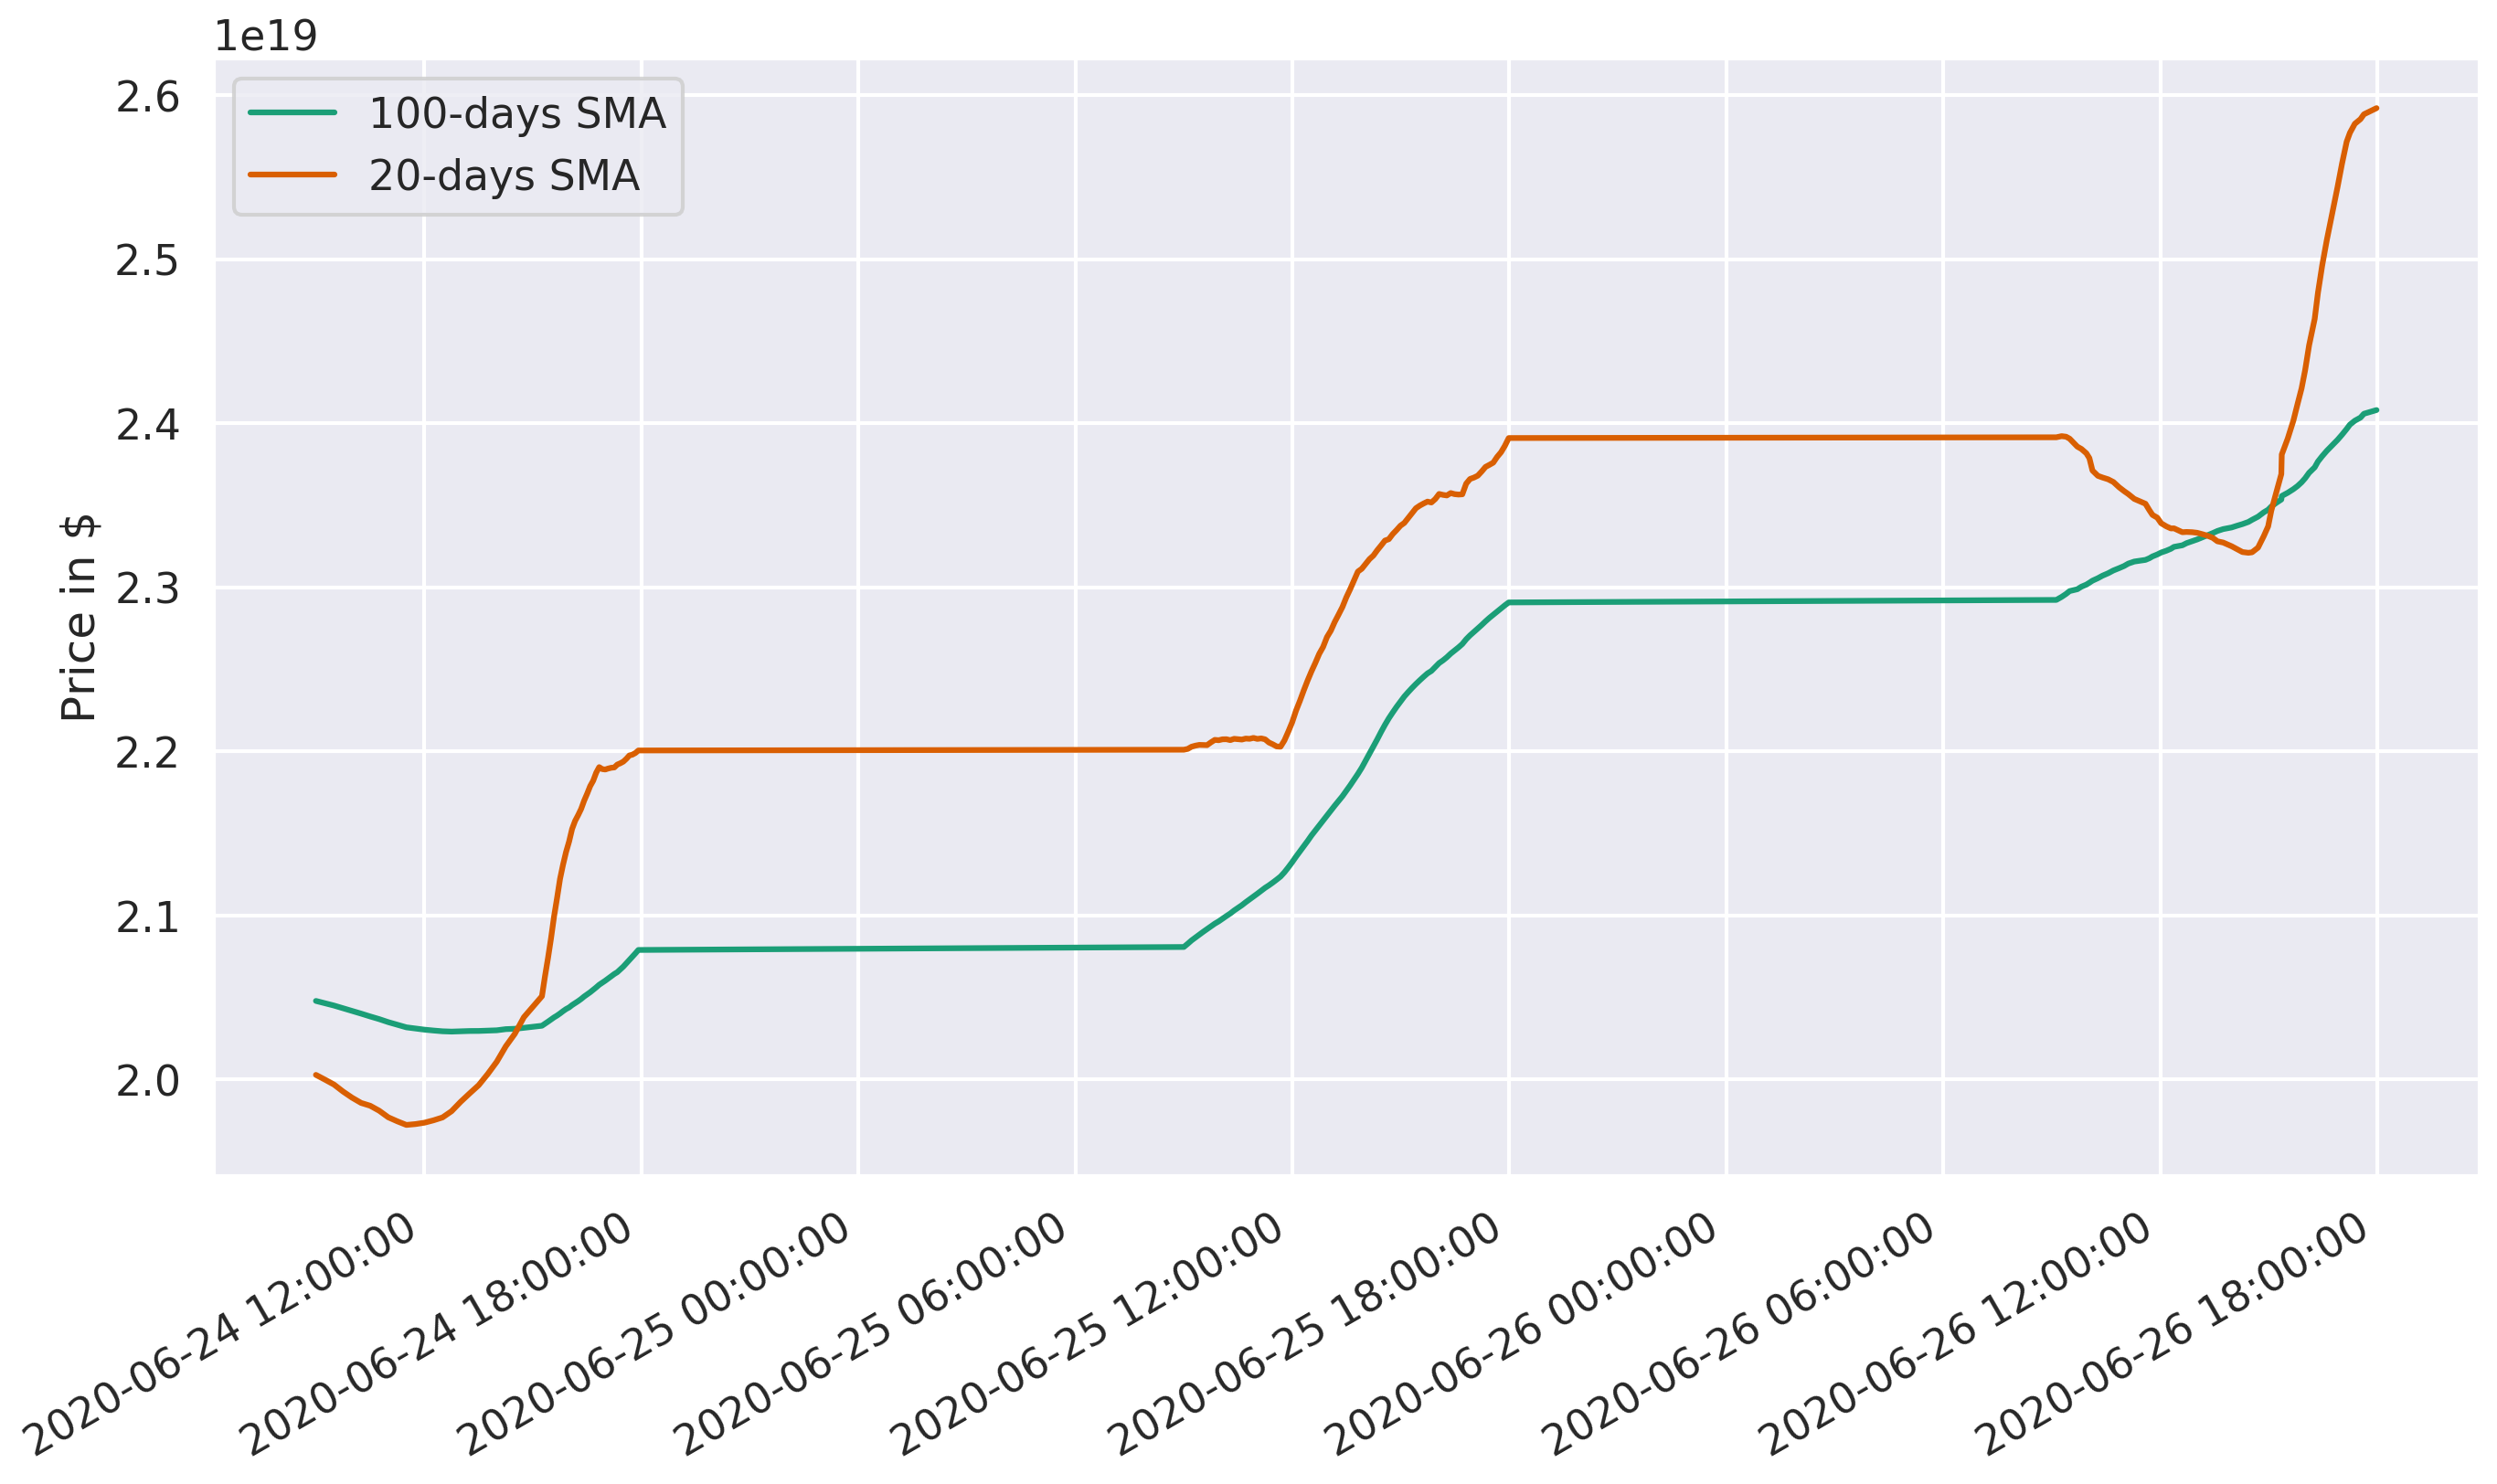

In [18]:
start_date = '2020-06-24 09:00:00'
end_date = '2020-06-26 17:58:48'

fig, ax = plt.subplots(figsize=(16,9))

#ax.plot(df_CST.loc[start_date:end_date, :].index, df_CST.loc[start_date:end_date, 'TokenCST'], label='Price')
ax.plot(long_MACST.loc[start_date:end_date, :].index, long_MACST.loc[start_date:end_date, 'TokenCST'], label = '100-days SMA')
ax.plot(short_MACST.loc[start_date:end_date, :].index, short_MACST.loc[start_date:end_date, 'TokenCST'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
#ax.xaxis.set_major_locator(mdates.DayLocator())
fig.autofmt_xdate()

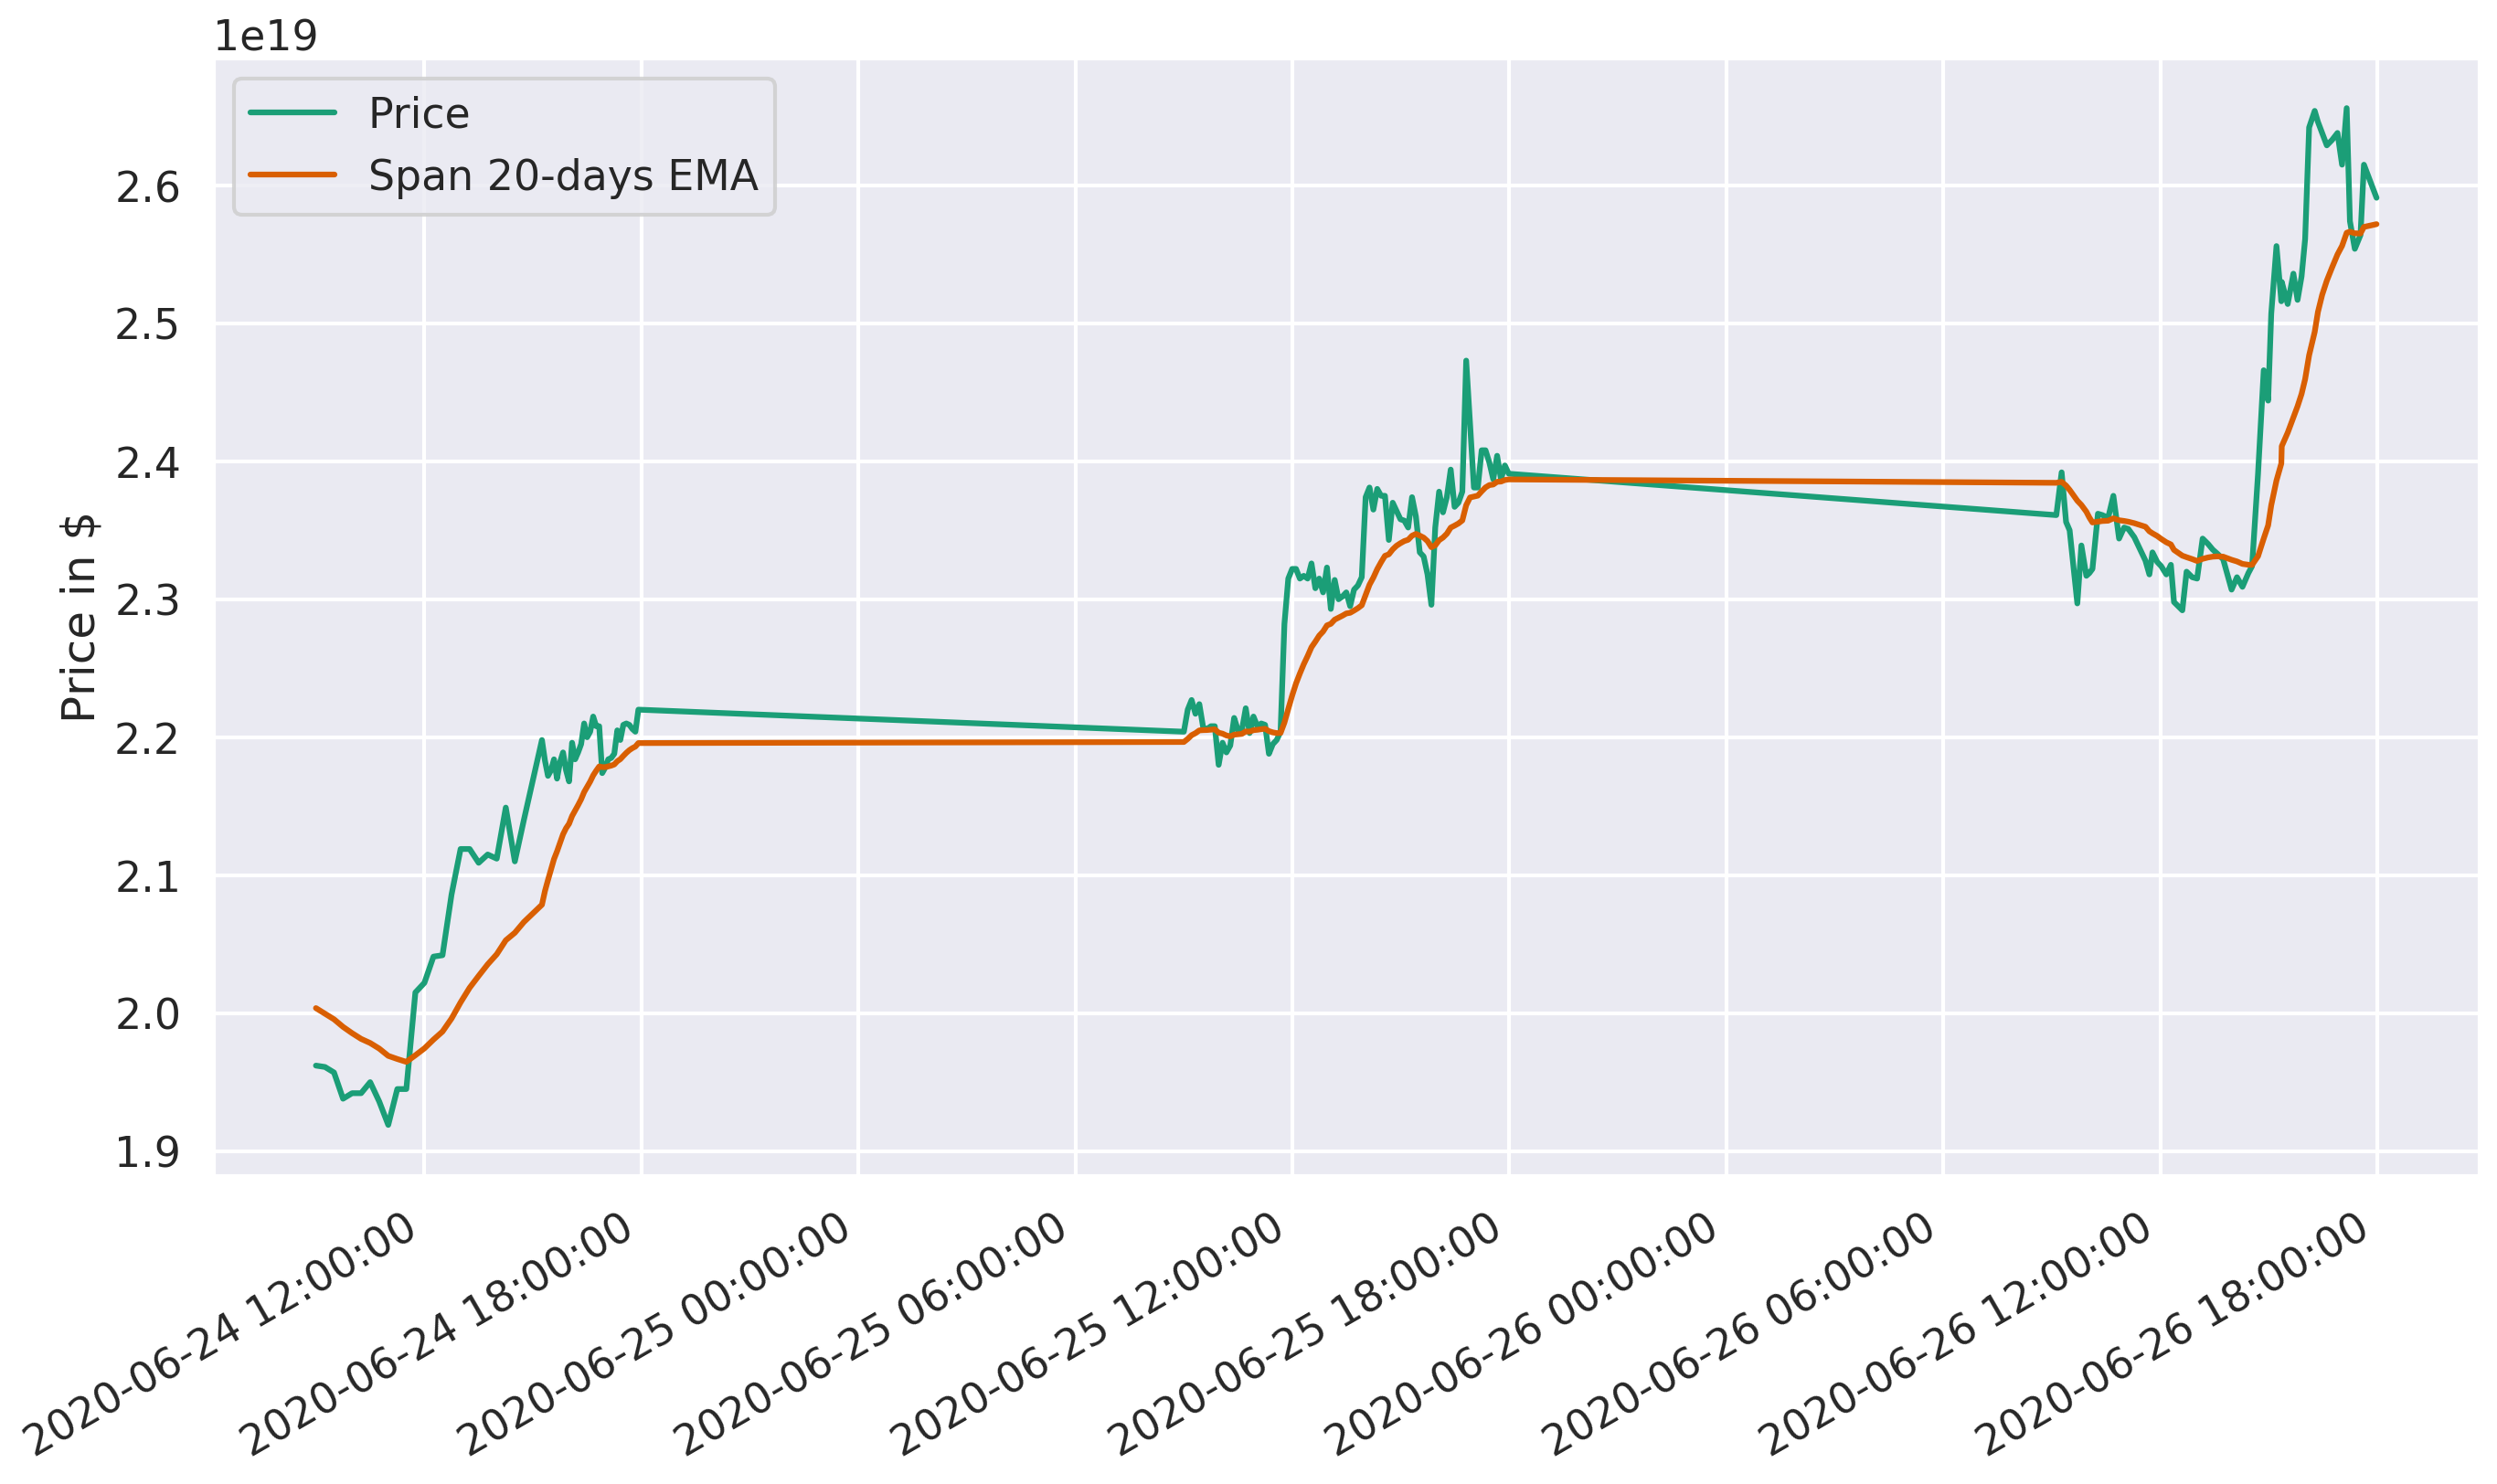

In [28]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(df_CST.loc[start_date:end_date, :].index, df_CST.loc[start_date:end_date, 'TokenCST'], label='Price')
ax.plot(ema_CST.loc[start_date:end_date, :].index, ema_CST.loc[start_date:end_date, 'TokenCST'], label = 'Span 20-days EMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
#ax.xaxis.set_major_locator(mdates.DayLocator())
fig.autofmt_xdate()

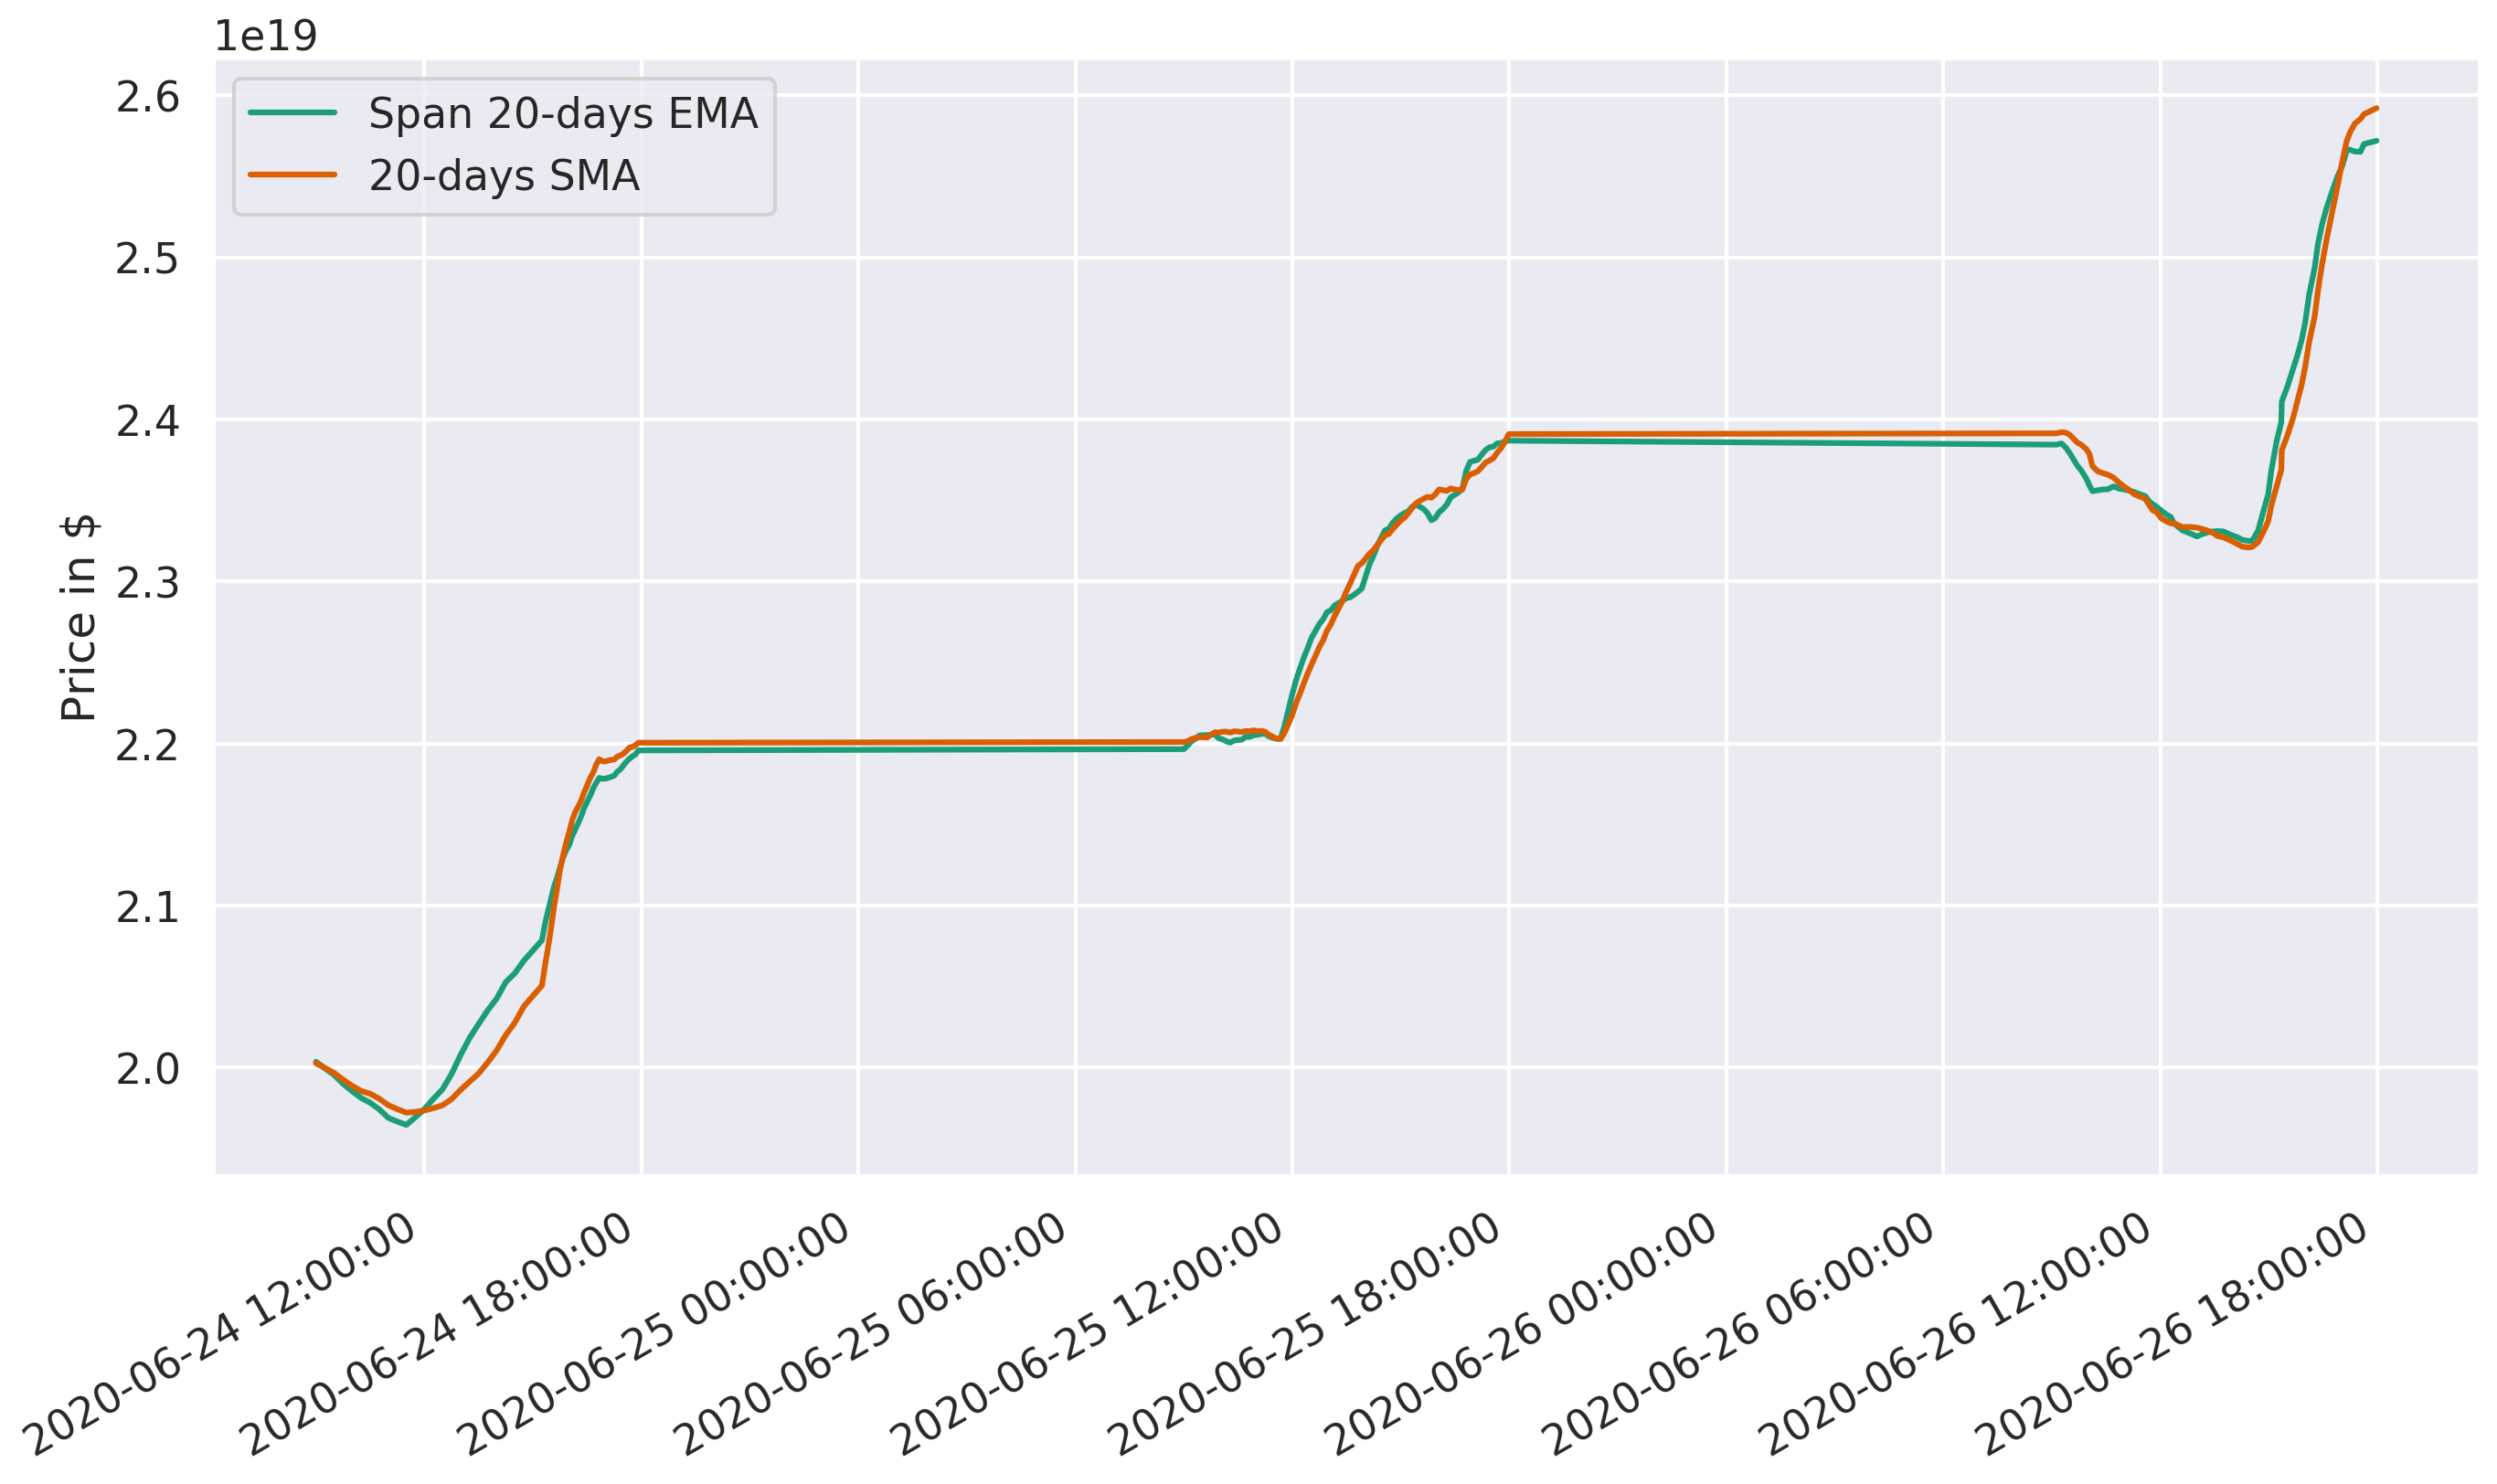

In [29]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(ema_CST.loc[start_date:end_date, :].index, ema_CST.loc[start_date:end_date, 'TokenCST'], label = 'Span 20-days EMA')
ax.plot(short_MACST.loc[start_date:end_date, :].index, short_MACST.loc[start_date:end_date, 'TokenCST'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
#ax.xaxis.set_major_locator(mdates.DayLocator())
fig.autofmt_xdate()

In [19]:
x = [datetime.datetime.strptime(d,'%Y-%m-%d %H:%M:%S') for d in df_AA.index]
df_AA.index = x
df_AA.index

DatetimeIndex(['2019-06-23 18:00:00', '2019-06-23 19:00:00',
               '2019-06-23 20:00:00', '2019-06-23 21:00:00',
               '2019-06-23 22:00:00', '2019-06-23 23:00:00',
               '2019-06-24 00:00:00', '2019-06-24 01:00:00',
               '2019-06-24 02:00:00', '2019-06-24 03:00:00',
               ...
               '2020-06-26 16:36:18', '2020-06-26 16:45:10',
               '2020-06-26 16:54:01', '2020-06-26 17:01:36',
               '2020-06-26 17:09:16', '2020-06-26 17:14:39',
               '2020-06-26 17:22:47', '2020-06-26 17:32:10',
               '2020-06-26 17:43:31', '2020-06-26 17:58:48'],
              dtype='datetime64[ns]', length=8960, freq=None)

In [20]:
short_MAAA = df_AA.rolling(window=20).mean()
long_MAAA = df_AA.rolling(window=100).mean()
ema_AA = df_AA.ewm(span=20, adjust=False).mean()

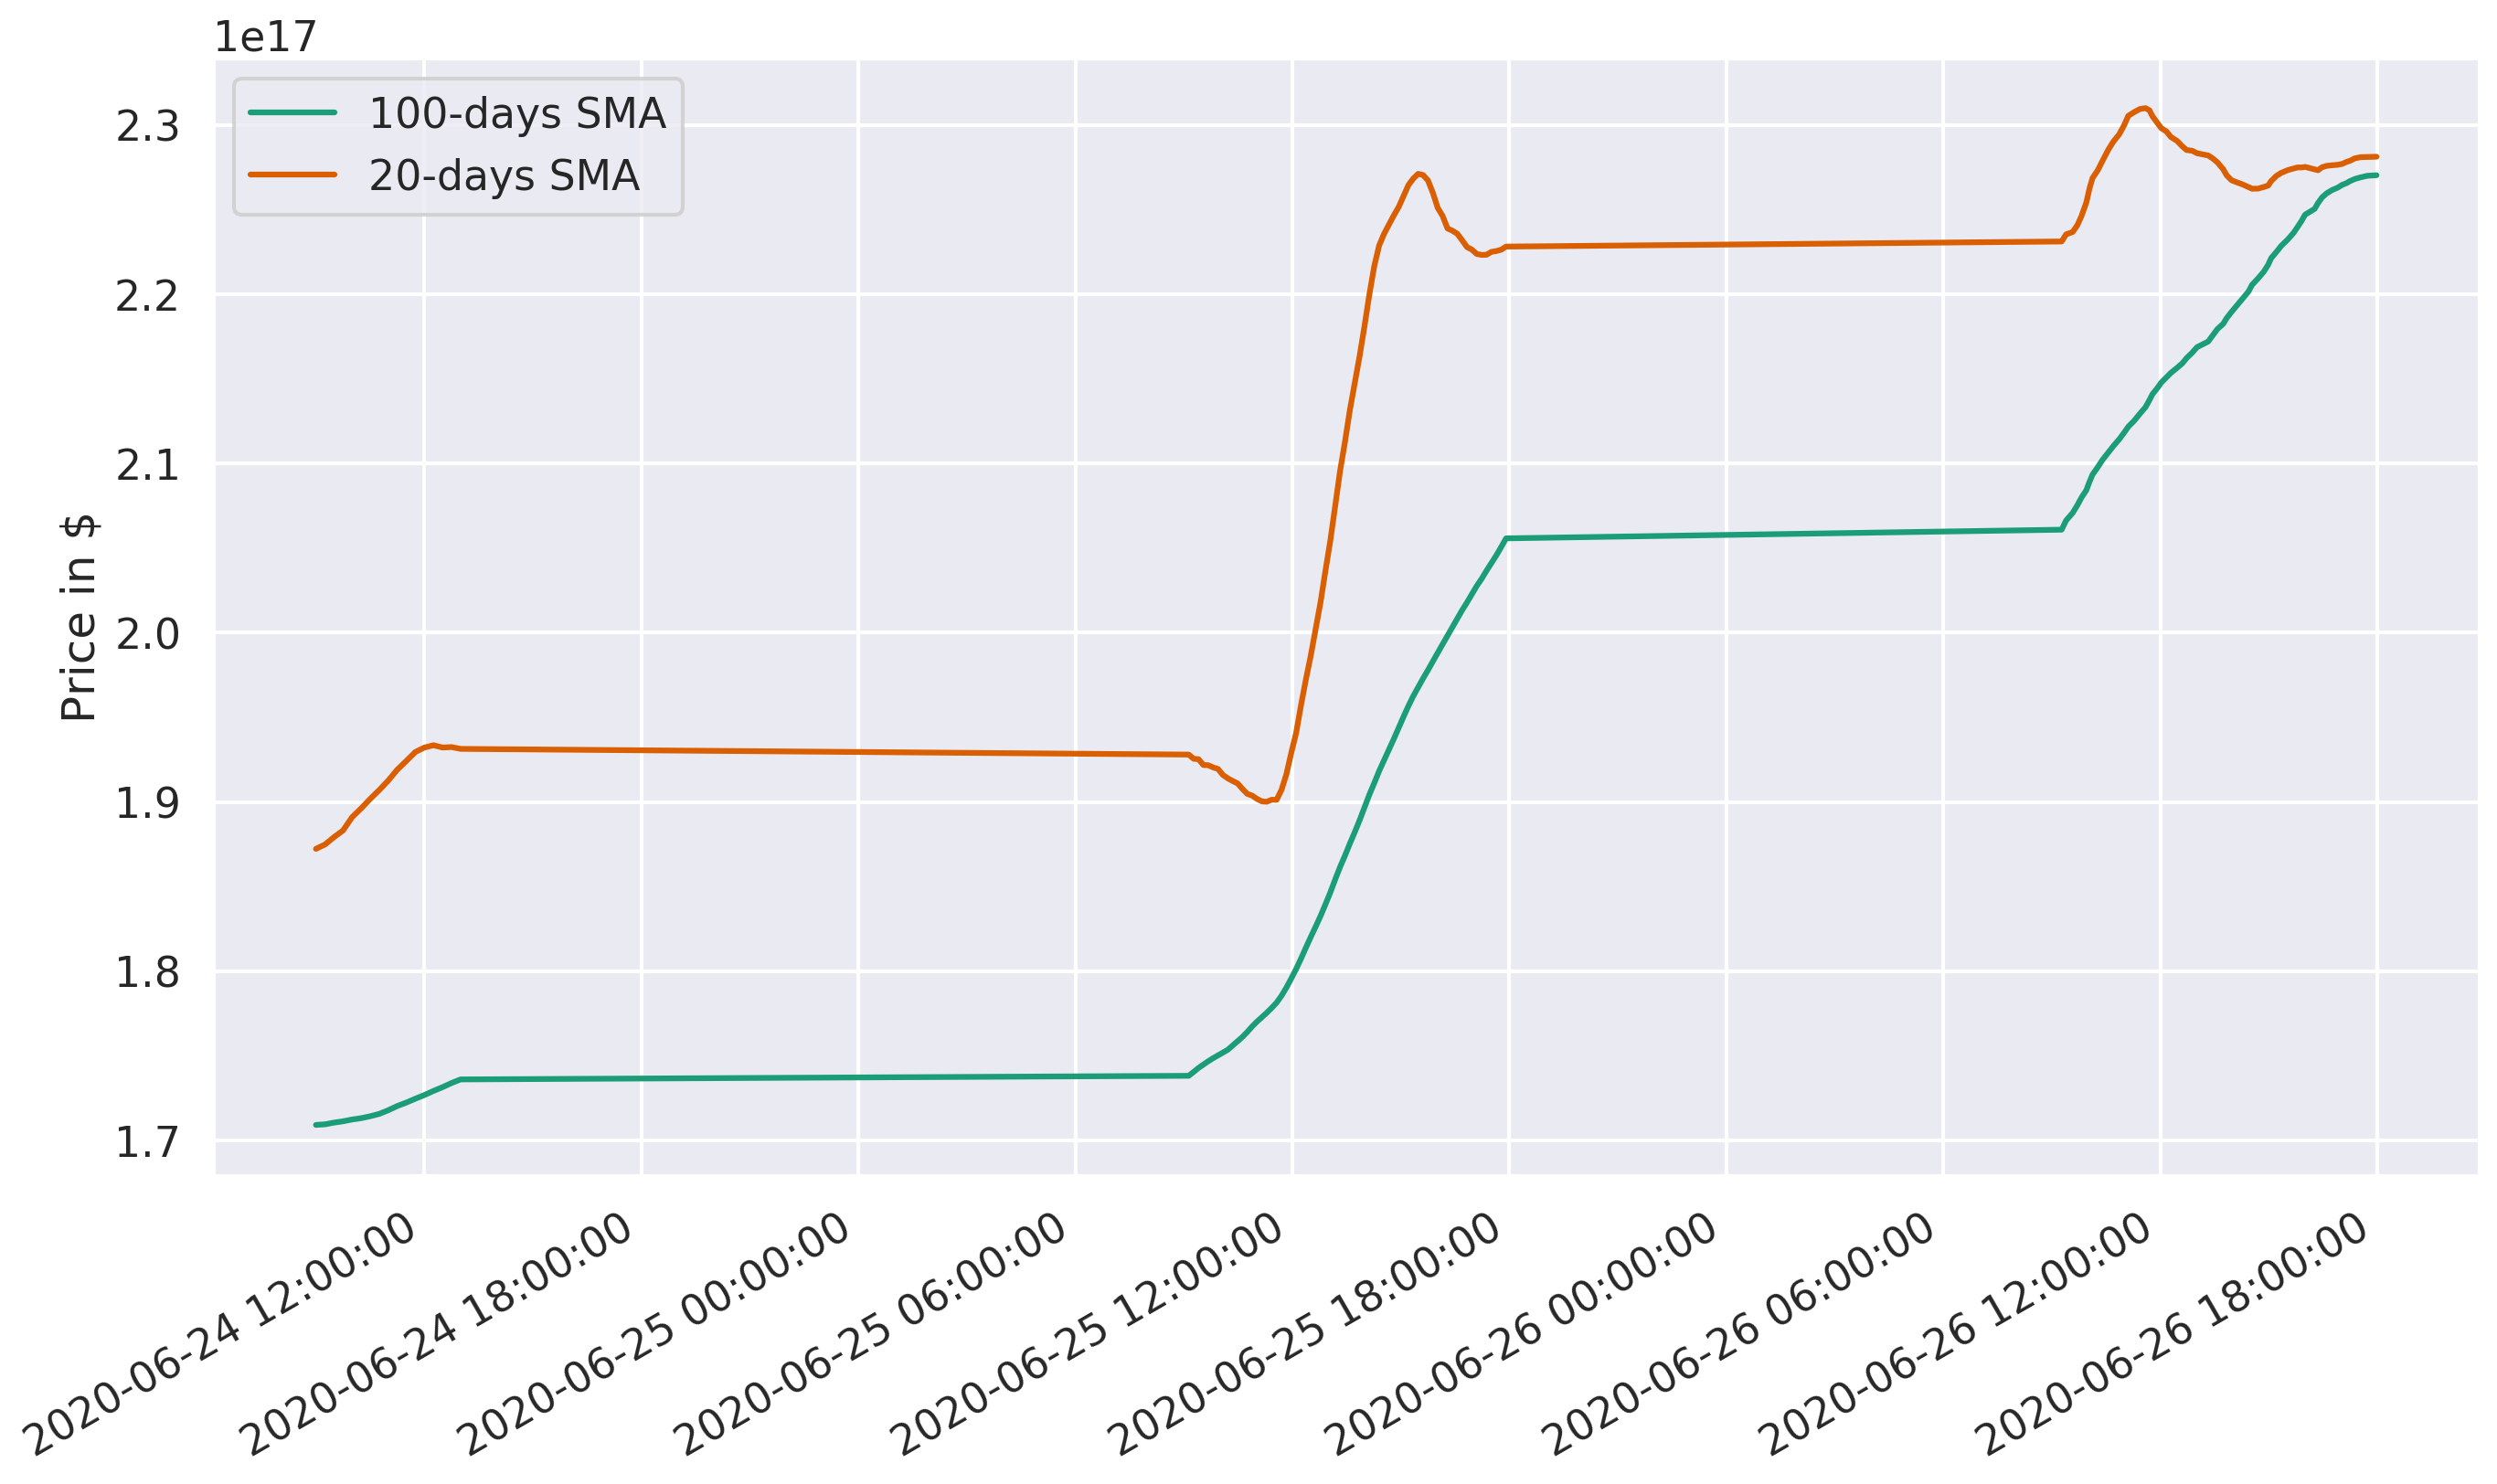

In [26]:
start_date = '2020-06-24 09:00:00'
end_date = '2020-06-26 17:58:48'

fig, ax = plt.subplots(figsize=(16,9))

#ax.plot(df_AA.loc[start_date:end_date, :].index, df_CST.loc[start_date:end_date, 'TokenCST'], label='Price')
ax.plot(long_MAAA.loc[start_date:end_date, :].index, long_MAAA.loc[start_date:end_date, 'TokenAA'], label = '100-days SMA')
ax.plot(short_MAAA.loc[start_date:end_date, :].index, short_MAAA.loc[start_date:end_date, 'TokenAA'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
#ax.xaxis.set_major_locator(mdates.DayLocator())
fig.autofmt_xdate()

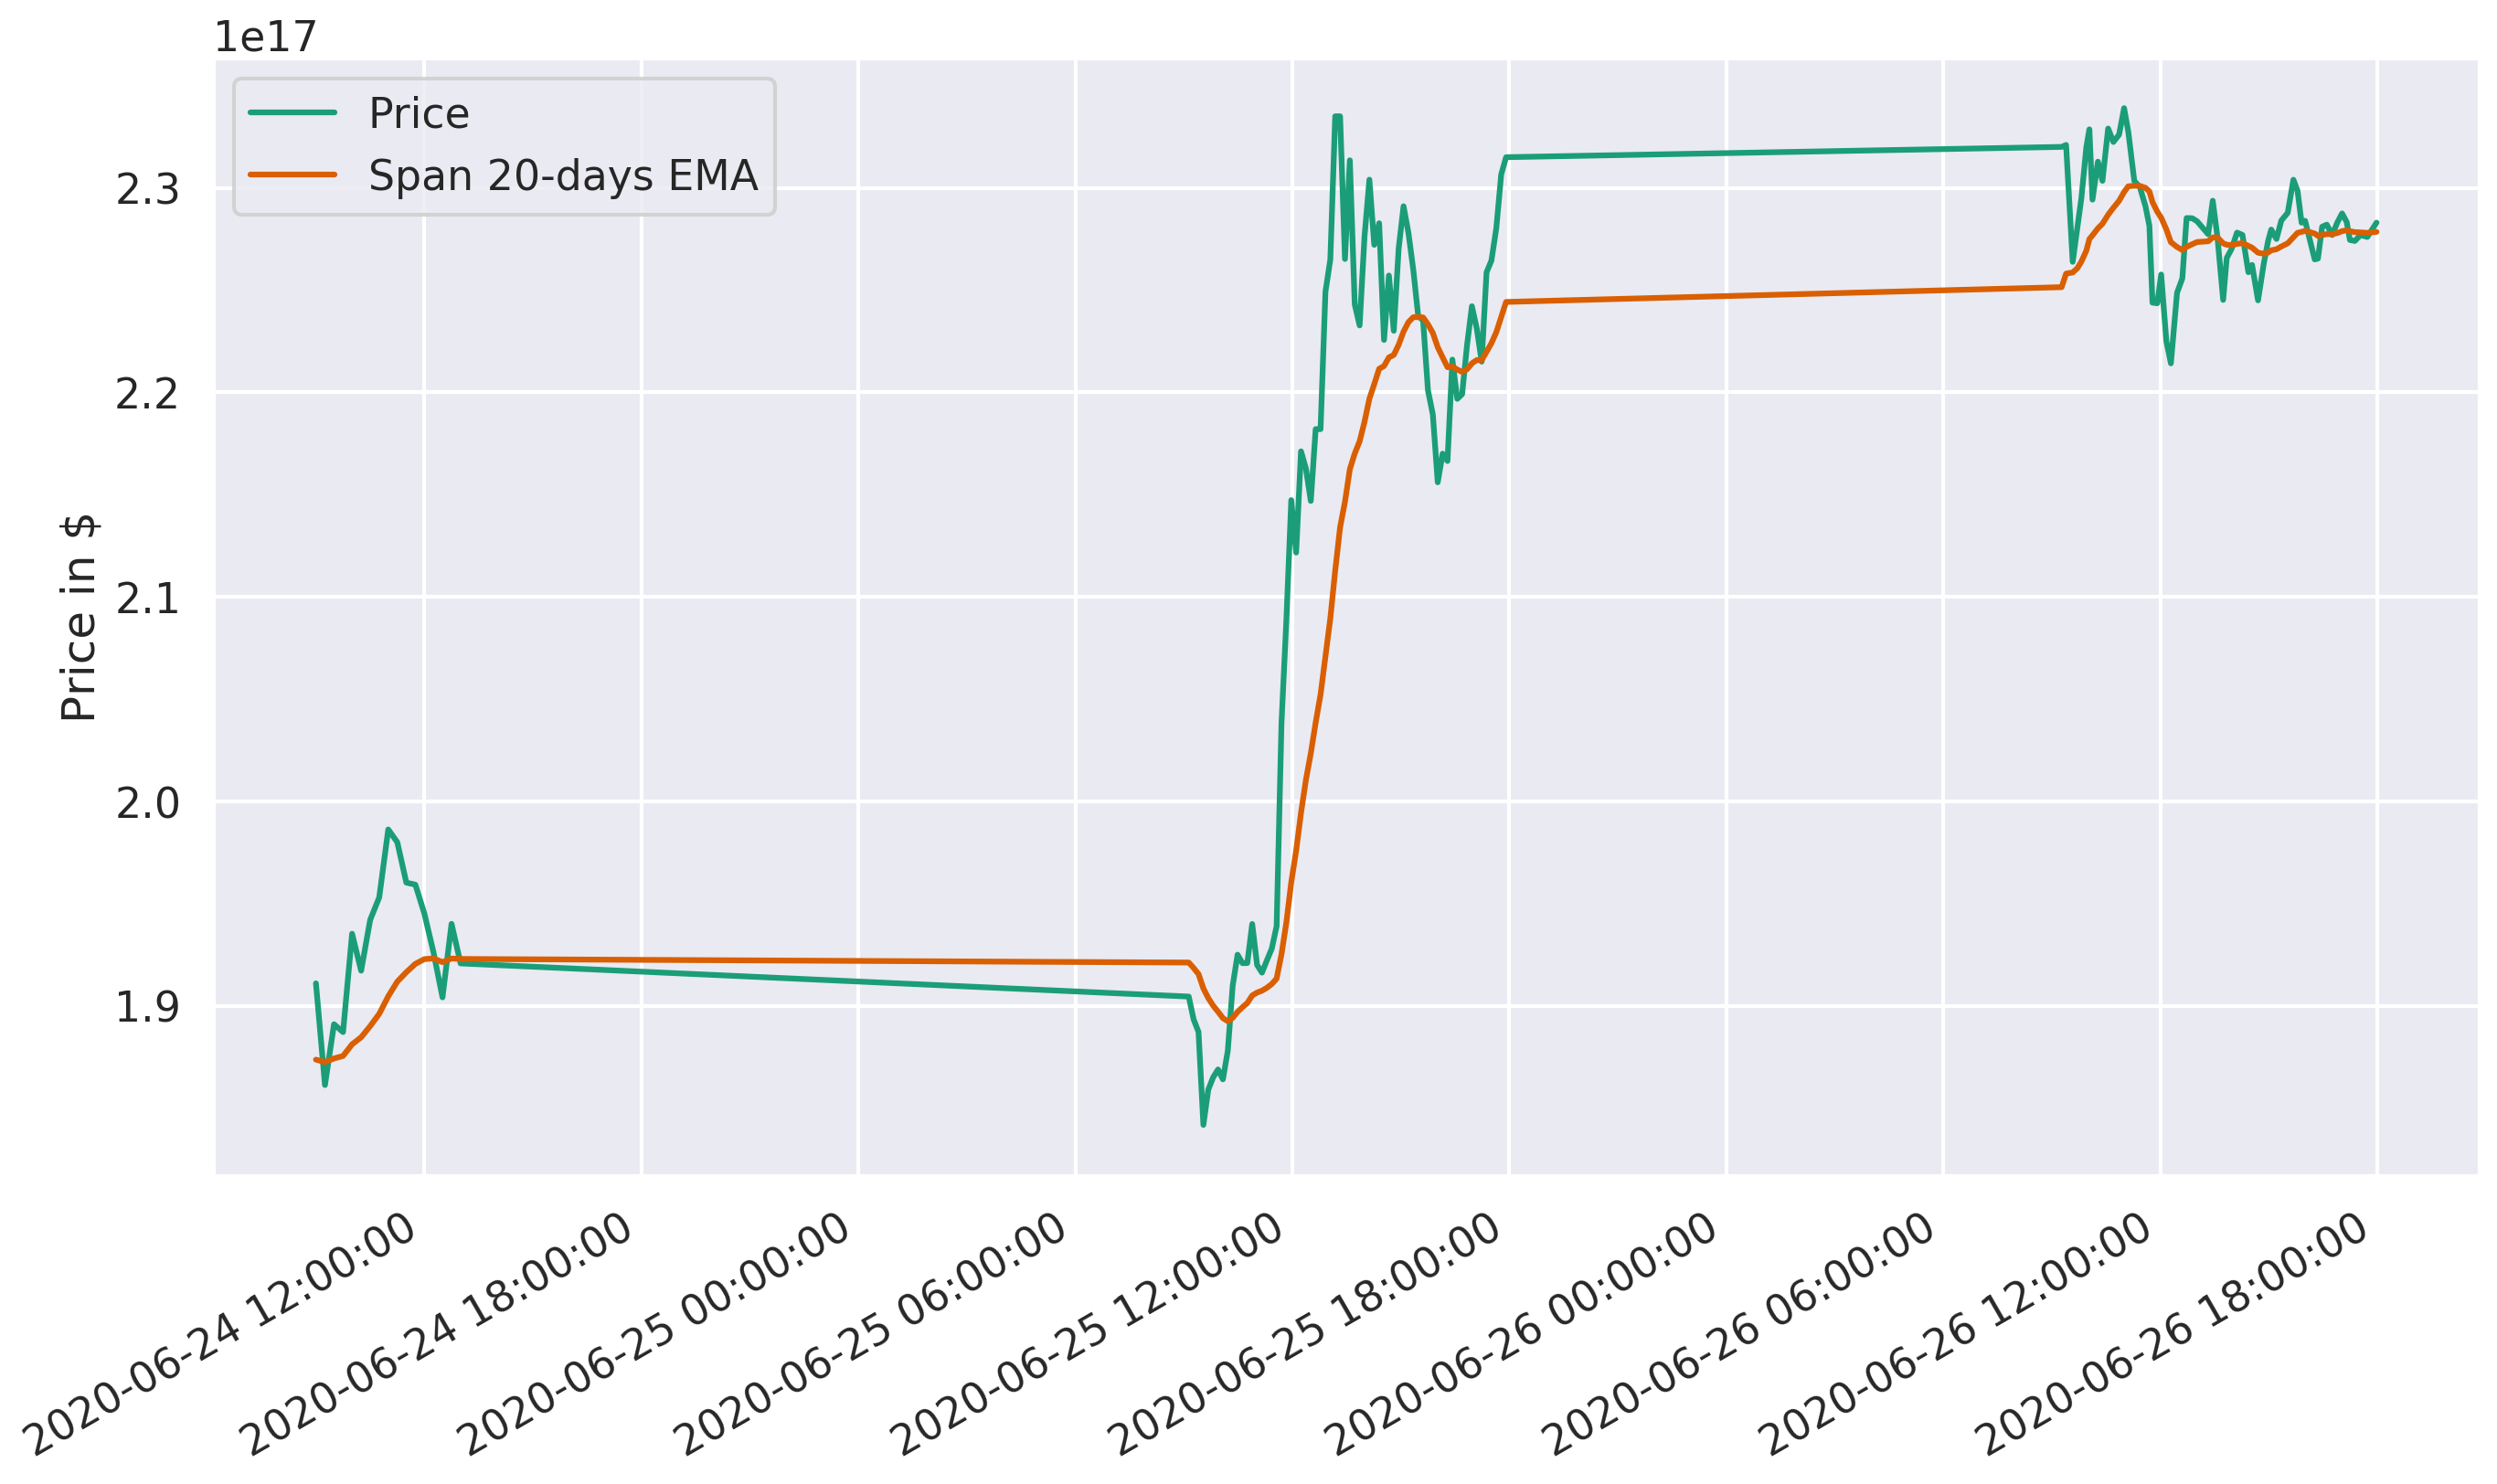

In [27]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(df_AA.loc[start_date:end_date, :].index, df_AA.loc[start_date:end_date, 'TokenAA'], label='Price')
ax.plot(ema_AA.loc[start_date:end_date, :].index, ema_AA.loc[start_date:end_date, 'TokenAA'], label = 'Span 20-days EMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
#ax.xaxis.set_major_locator(mdates.DayLocator())
fig.autofmt_xdate()

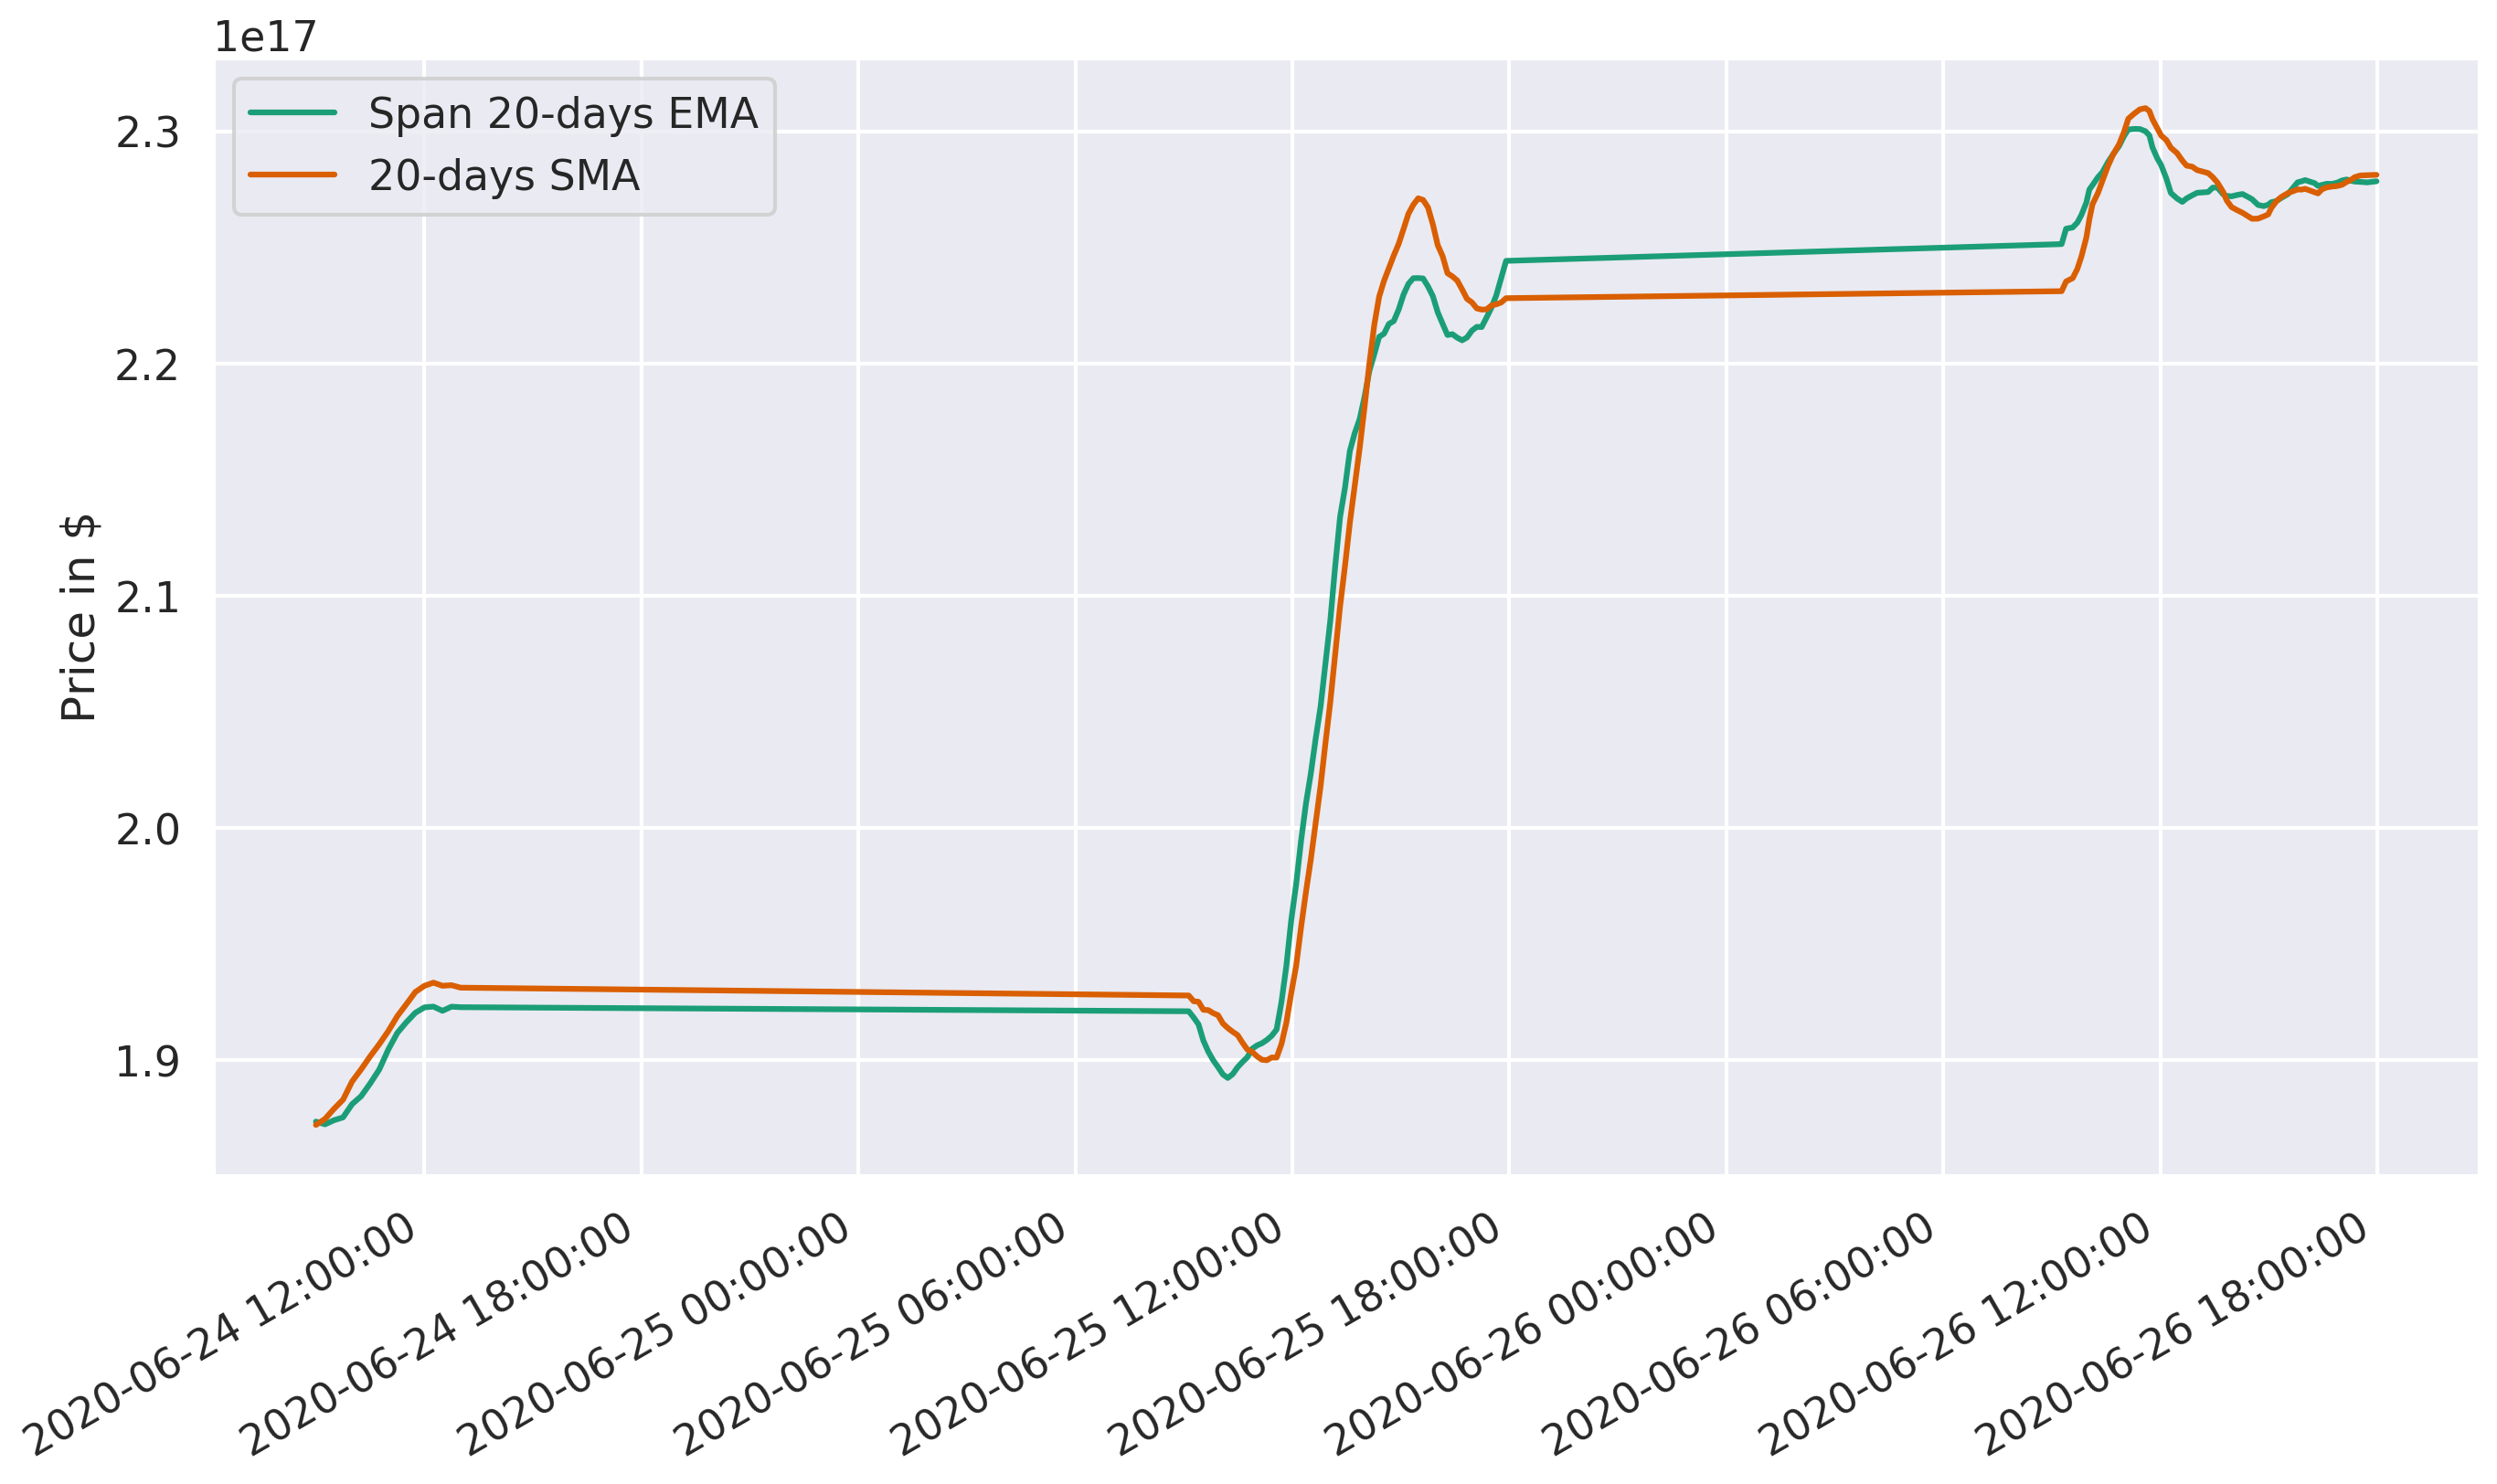

In [30]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(ema_AA.loc[start_date:end_date, :].index, ema_AA.loc[start_date:end_date, 'TokenAA'], label = 'Span 20-days EMA')
ax.plot(short_MAAA.loc[start_date:end_date, :].index, short_MAAA.loc[start_date:end_date, 'TokenAA'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
#ax.xaxis.set_major_locator(mdates.DayLocator())
fig.autofmt_xdate()